# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
import plotly.express as px
cf.go_offline()

from string import ascii_letters

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
df.drop(columns='Id', inplace=True)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# calculating the percentage
percent_missing = df.isnull().sum() * 100 / len(df)

# creating the new data drame
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

# dropping the 0 values
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 20]
missing_value_df

,column_name,percent_missing
FireplaceQu,FireplaceQu,47.260274
Fence,Fence,80.753425
Alley,Alley,93.767123
MiscFeature,MiscFeature,96.301370
PoolQC,PoolQC,99.520548


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# dropping columns with more than 20% missing values.
df = df.drop(missing_value_df.index, axis=1)

In [6]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

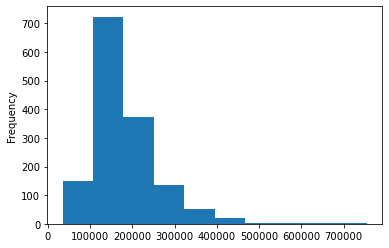

In [7]:
# using histogram plot to see the distribution of sale prices column.
df['SalePrice'].plot(kind='hist')

plt.show()

In [8]:
"""
The distribution is skewed to the left. That means that mean is less than the median and the median is less than the mode.
"""

'\nThe distribution is skewed to the left. That means that mean is less than the median and the median is less than the mode.\n'

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [9]:
# first let's see the p-value.
resp = df.SalePrice
from scipy.stats import shapiro
shapiro(resp)[1]

# p = 3.206247534576162e-33. It's more than 0.05, so we can confirm that is skewed.

3.206247534576162e-33

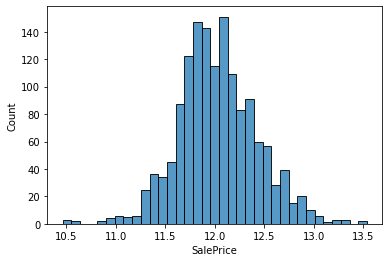

In [10]:
# applying square root to Sale Price column.
sqrt_resp = resp**(.5)

# its still skewed, so we apply reciprocal transformation
recip = (1/resp)

# log transformation to make it simetrical
log_resp = np.log(resp)
sns.histplot(log_resp)

# the log transformation seems to be the most symmetrical.


plt.show()

In [11]:
# creating a new column with Sale Prices ajusted.
df['SalePriceAdjusted'] = log_resp

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

### Bathrooms vs Sale Price

In [12]:
# creating a data frame with important columns to delete data noise. 
#df_factors = df[['GrLivArea', 'LotArea', 'GarageArea', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'SalePrice', 'BsmtHalfBath', 'YearBuilt', 'YearRemodAdd', 'Neighborhood']]

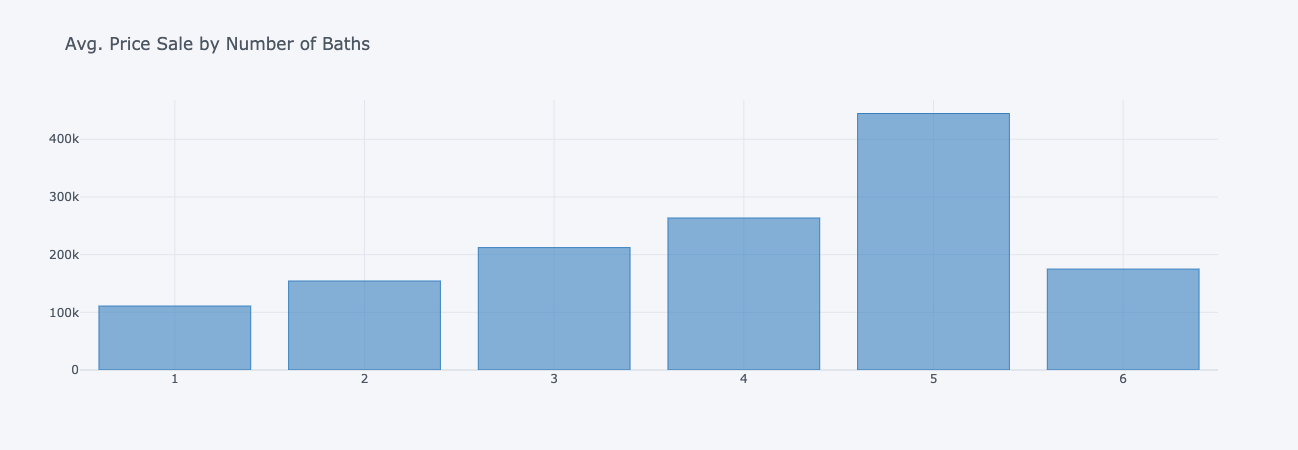

In [13]:
# number of total bathrooms column (bsmt = basement)
df['TotalBaths'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

# creating a groupby to see the mean sale price by number of baths.
mean_price_by_totalbaths = df.groupby('TotalBaths', as_index=False).agg({'SalePrice': 'mean'})

# creating a interactive plot with cufflinks to see the mean sale price by number of baths. 
mean_price_by_totalbaths.iplot(kind='bar',
                              x='TotalBaths',
                              y='SalePrice',
                              title='Avg. Price Sale by Number of Baths',
                              color='blue')

In [14]:
"""
It's quite extrange that house with 6 bathrooms are cheaper than 5 bathrooms houses. Maybe it's becuase of the age of the house, let's check it.
"""

"\nIt's quite extrange that house with 6 bathrooms are cheaper than 5 bathrooms houses. Maybe it's becuase of the age of the house, let's check it.\n"

In [16]:
df[(df['TotalBaths'] == 6) | (df['TotalBaths'] == 5)].sort_values('TotalBaths')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,TotalBaths
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,10,2007,New,Partial,184750,12.126759,5
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,2007,WD,Normal,755000,13.534473,5
745,60,RL,NaN,8963,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,7,2008,WD,Normal,299800,12.610871,5
769,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,210,0,0,6,2010,WD,Normal,538000,13.195614,5
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,7,2006,WD,Normal,625000,13.345507,5
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,555,0,7,2007,WD,Abnorml,745000,13.521139,5
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,480,0,1,2008,New,Partial,160000,11.982929,5
1386,60,RL,80.0,16692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,440,519,2000,7,2006,WD,Normal,250000,12.429216,5
738,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,3,2009,WD,Alloca,179000,12.095141,6
921,90,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,145900,11.890677,6


In [17]:
"""
Seeing the table, we see that 6 baths houses are smaller and older than 5 baths and don't have a garage. For that reasons, are cheaper.
"""

"\nSeeing the table, we see that 6 baths houses are smaller and older than 5 baths and don't have a garage. For that reasons, are cheaper.\n"

### Age of the house vs Sale Price

In [18]:
# creating columns with total years from 
df['AgesBuilt'] = 2021 - df['YearBuilt']
df['AgesRemodAdd'] = 2021 - df['YearRemodAdd']    

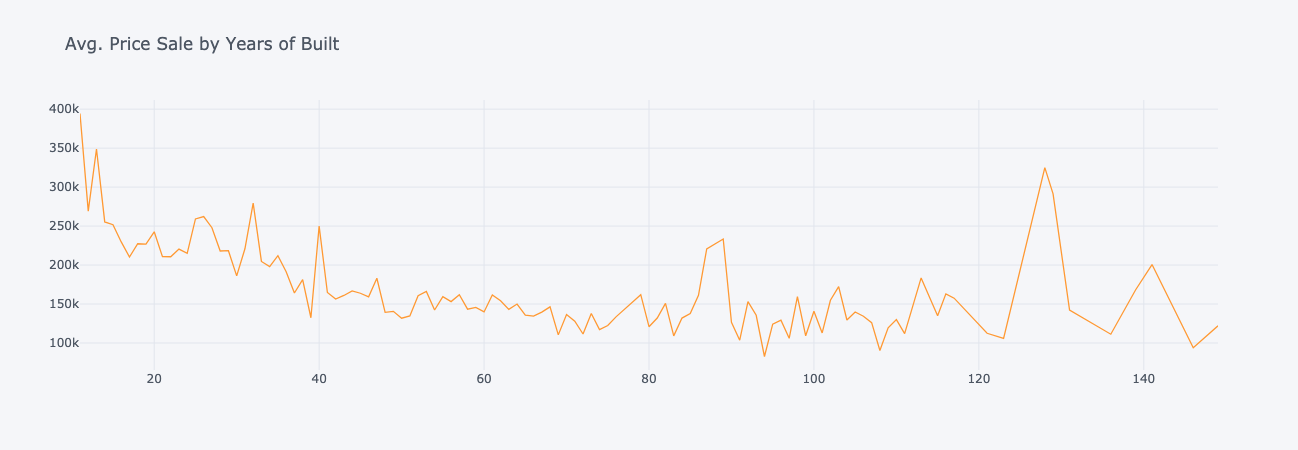

In [19]:
# let's see first how change the price depending on the years that the house have been built.
price_by_years_built = df.groupby('AgesBuilt', as_index=False).agg({'SalePrice': 'mean'})


# creating a line chart with cufflinks.
price_by_years_built.iplot(kind='line',
                          x='AgesBuilt',
                          y='SalePrice',
                          title='Avg. Price Sale by Years of Built')

In [20]:
"""
As we expected, the younger the house, the more expensive it is. 
But there are some values, such as 87-88 years old and 128 years old, that the price increase a lot.
Maybe it's due to the size of the house or if they have been remodel. Let's check it:
"""

"\nAs we expected, the younger the house, the more expensive it is. \nBut there are some values, such as 87-88 years old and 128 years old, that the price increase a lot.\nMaybe it's due to the size of the house or if they have been remodel. Let's check it:\n"

In [21]:
df[(df['AgesBuilt'] >= 87) & (df['AgesBuilt'] < 90)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,TotalBaths,AgesBuilt,AgesRemodAdd
51,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,400,9,2006,WD,Normal,114500,11.648330,1,87,71
190,70,RL,70.0,10570,Pave,Reg,Bnk,AllPub,Inside,Mod,...,0,12,2007,WD,Normal,315000,12.660328,3,89,27
463,70,RL,74.0,11988,Pave,IR1,HLS,AllPub,Inside,Mod,...,0,8,2008,WD,Normal,188700,12.147914,2,87,26
608,70,RL,78.0,12168,Pave,Reg,HLS,AllPub,Inside,Mod,...,0,9,2007,WD,Alloca,359100,12.791356,3,87,23
681,50,RH,55.0,4500,Pave,IR2,Bnk,AllPub,Inside,Gtl,...,0,7,2009,WD,Abnorml,159434,11.979385,1,89,21
1059,50,RL,NaN,11275,Pave,IR1,HLS,AllPub,Corner,Mod,...,0,3,2007,WD,Normal,220000,12.301383,2,89,71
1174,70,RL,80.0,16560,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,7,2006,WD,Normal,239000,12.384219,3,89,71


In [22]:
# let's see the medium LotArea to compare to the 87-90 years old houses.
df['LotArea'].mean(axis=0)

10516.828082191782

In [23]:
"""
The mean lot area is 10,516, and if we compare it with our 87-90 houses, some of them are above and those are not, have been remodeled recently.
Also, the houses are mainly in the Crawdor neighbourhood, so we can guess that it's a hight quality area. 
"""

"\nThe mean lot area is 10,516, and if we compare it with our 87-90 houses, some of them are above and those are not, have been remodeled recently.\nAlso, the houses are mainly in the Crawdor neighbourhood, so we can guess that it's a hight quality area. \n"

### Years of remodeling vs Sale Price

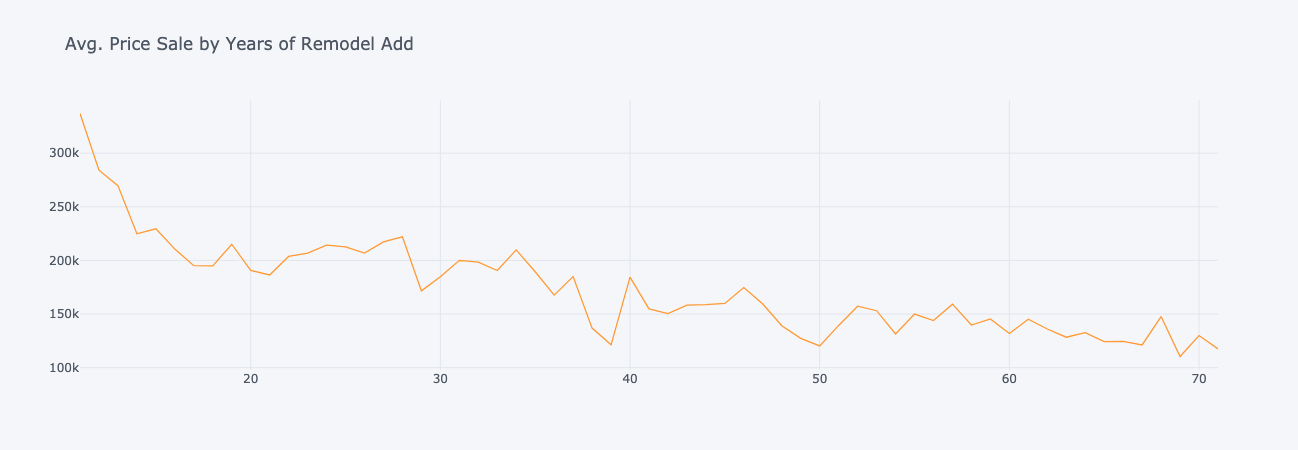

In [24]:
# let's see also how change the price depending on the years that the house have been remodel.
price_by_years_built = df.groupby('AgesRemodAdd', as_index=False).agg({'SalePrice': 'mean'})


# creating a line chart with cufflinks.
price_by_years_built.iplot(kind='line',
                          x='AgesRemodAdd',
                          y='SalePrice',
                          title='Avg. Price Sale by Years of Remodel Add')

In [25]:
"""
As we expected, the most recently the remodel is, the more expensive it is. 
Houses remodeled 11 years ago, it cost more than 300k dollars on average, while whouses remodeled 70 years ago, it cost 129k dollars on average. 
Again we have some points that call our attention, houses remodeled 39 and 50 years ago. Let's go deep into this:
"""

"\nAs we expected, the most recently the remodel is, the more expensive it is. \nHouses remodeled 11 years ago, it cost more than 300k dollars on average, while whouses remodeled 70 years ago, it cost 129k dollars on average. \nAgain we have some points that call our attention, houses remodeled 39 and 50 years ago. Let's go deep into this:\n"

In [26]:
df[(df['AgesRemodAdd'] == 39) | (df['AgesRemodAdd'] == 37)].sort_values('AgesRemodAdd')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,TotalBaths,AgesBuilt,AgesRemodAdd
160,20,RL,NaN,11120,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,6,2008,WD,Normal,162500,11.998433,2,37,37
295,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,3,2006,WD,Normal,142500,11.867097,2,37,37
372,120,RL,50.0,7175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2010,WD,Normal,125000,11.736069,2,37,37
685,160,RL,NaN,5062,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,9,2007,WD,Normal,207500,12.242887,3,37,37
859,60,RL,NaN,11029,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,8,2006,WD,Normal,250000,12.429216,4,53,37
1017,120,RL,NaN,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,8,2009,COD,Abnorml,187500,12.141534,2,37,37
1075,70,RL,75.0,13125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,7,2007,CWD,Normal,219500,12.299108,2,81,37
88,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,10,2009,ConLD,Abnorml,85000,11.350407,1,106,39
125,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,2006,WD,Normal,84500,11.344507,2,86,39
274,20,RL,76.0,8314,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,6,2007,WD,Normal,124500,11.732061,1,39,39


In [27]:
"""
If we comparte the 39 years remodeled with 37, we can see that 39 houses are small ones and have less baths into the houses.
Also we can see that houses in SawyerW neightbourhood are cheaper than the others.
"""

'\nIf we comparte the 39 years remodeled with 37, we can see that 39 houses are small ones and have less baths into the houses.\nAlso we can see that houses in SawyerW neightbourhood are cheaper than the others.\n'

### What Factors are more important to the price?

In [28]:
# garage, total baths, full bath, girlivearea, neigbourhood, years of last remodelation and age of the building.

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

In [29]:
sns.set_theme(style="white")

In [30]:
# Compute the correlation matrix
corr = df.corr()

In [31]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

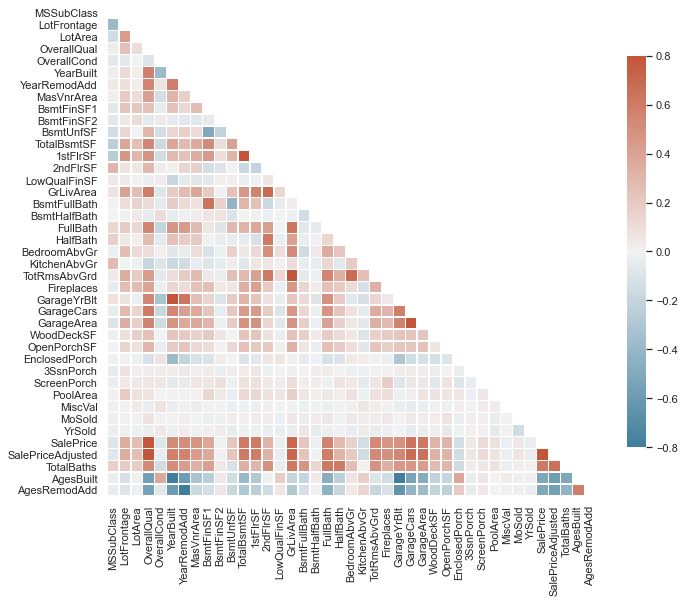

In [35]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.show()

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [36]:
"""
As we can see in the heatmap, the variables that have more correlation with Sale Price are: 
- *OverallQual:Overall material and finish quality
- *YearBuilt 
- *YearRemodAdd
- MasVnrArea
- BsmtFnsF1
- *GrLivArea
- *FullBath
- Fireplaces
- *GarageArea
"""

'\nAs we can see in the heatmap, the variables that have more correlation with Sale Price are: \n- OverallQual X\n- YearBuilt X\n- YearRemodAdd X\n- MasVnrArea\n- BsmtFnsF1\n- GrLivArea X\n- FullBath X\n- Fireplaces\n- GarageArea X\n'

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

### Factor 1: Sale Price by OverallQual

In [40]:
# using unique we find out that there are 10 levels of Overall Quality.
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [44]:
# making groupby to see the mean price by overall quality level.
sale_price_by_overallqual = df.groupby('OverallQual', as_index=False).agg({'SalePrice': 'mean'})

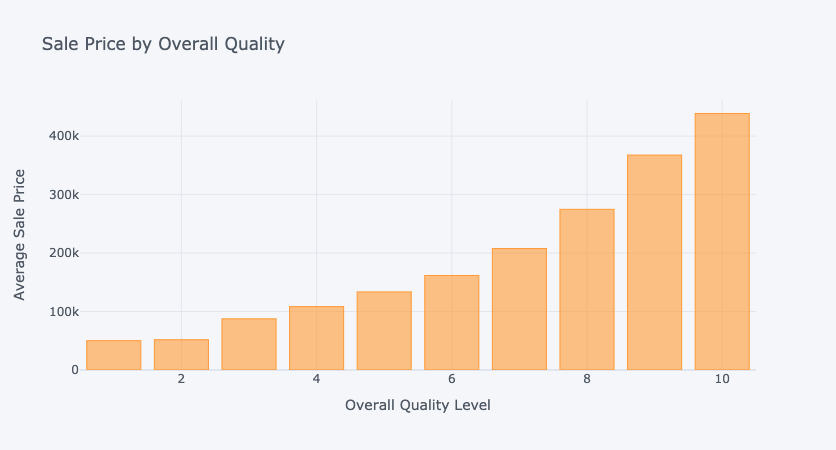

In [49]:
# creating the plot to see the relation between two variables.
sale_price_by_overallqual.iplot(kind='bar',
                               x='OverallQual',
                               y='SalePrice',
                               title='Sale Price by Overall Quality',
                               xTitle='Overall Quality Level',
                               yTitle='Average Sale Price')

In [50]:
# conclusions
'''
This graph shows the average sale price by each quality level. 
It highlights that the higher quality level, the higher the average sale price.
'''

'\nThis graph shows the average sale price by each quality level. \nIt highlights that the higher quality level, the higher the average sale price.\n'

### Factor 2: Sale Price by Year Built

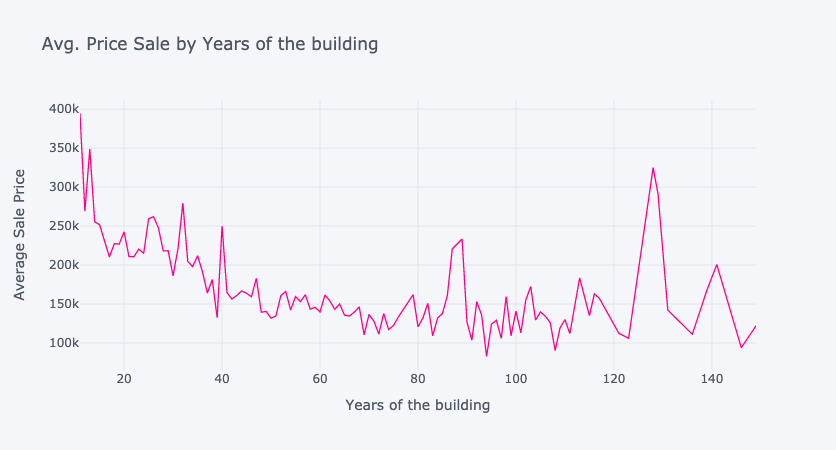

In [65]:
# let's see first how change the price depending on the years that the house have been built.
price_by_years_built = df.groupby('AgesBuilt', as_index=False).agg({'SalePrice': 'mean'})


# creating a line chart with cufflinks.
price_by_years_built.iplot(kind='line',
                          x='AgesBuilt',
                          y='SalePrice',
                          title='Avg. Price Sale by Years of the building',
                           xTitle='Years of the building',
                           yTitle='Average Sale Price',
                           color='pink')

In [67]:
#conclusion:

"""
This graph shows that the younger the house, the more expensive it is. 
The points where the sale price increase suddenly, it's due to there are some big houses wich are in 
a good neighbourhood (Crawdor).
"""

"\nThis graph shows that the younger the house, the more expensive it is. \nThe points where the sale price increase suddenly, it's due to there are some big houses wich are in \na good neighbourhood (Crawdor).\n"

### Factor 3: Sale Price by Year Remodel Add

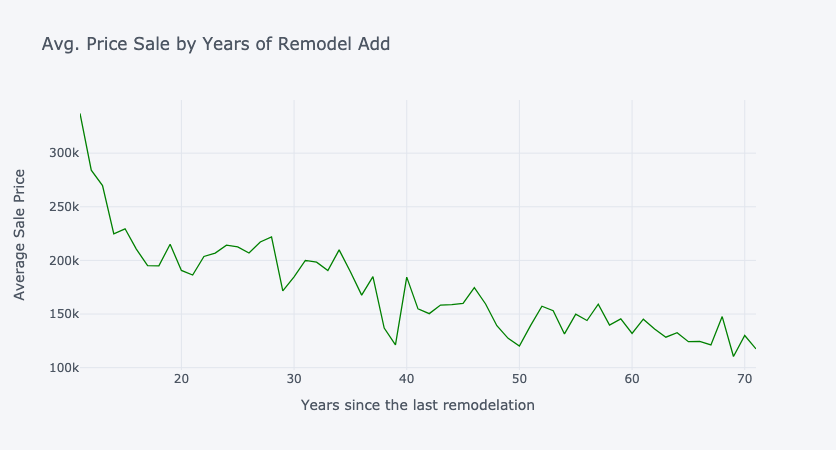

In [63]:
# let's see also how change the price depending on the years that the house have been remodel.
price_by_years_built = df.groupby('AgesRemodAdd', as_index=False).agg({'SalePrice': 'mean'})


# creating a line chart with cufflinks.
price_by_years_built.iplot(kind='line',
                          x='AgesRemodAdd',
                          y='SalePrice',
                          title='Avg. Price Sale by Years of Remodel Add',
                           xTitle='Years since the last remodelation',
                           yTitle='Average Sale Price',
                           color='green')

In [68]:
# conclusion:

"""
The graph shows that the most recently the remodel is, the more expensive it is. 

Houses remodeled 11 years ago, it cost more than 300k dollars on average, 
while whouses remodeled 70 years ago, it cost 129k dollars on average. 

In some points, the houses are smaller and have less baths into the houses that others,
for that reasion there are anormal points where the sale price drops too much.

Also we can see that houses in SawyerW neightbourhood are cheaper than the others.
"""

'\nThe graph shows that the most recently the remodel is, the more expensive it is. \n\nHouses remodeled 11 years ago, it cost more than 300k dollars on average, \nwhile whouses remodeled 70 years ago, it cost 129k dollars on average. \n\nIn some points, the houses are smaller and have less baths into the houses that others,\nfor that reasion there are anormal points where the sale price drops too much.\n\nAlso we can see that houses in SawyerW neightbourhood are cheaper than the others.\n'

### Factor 4: Sale Price by GrLivArea

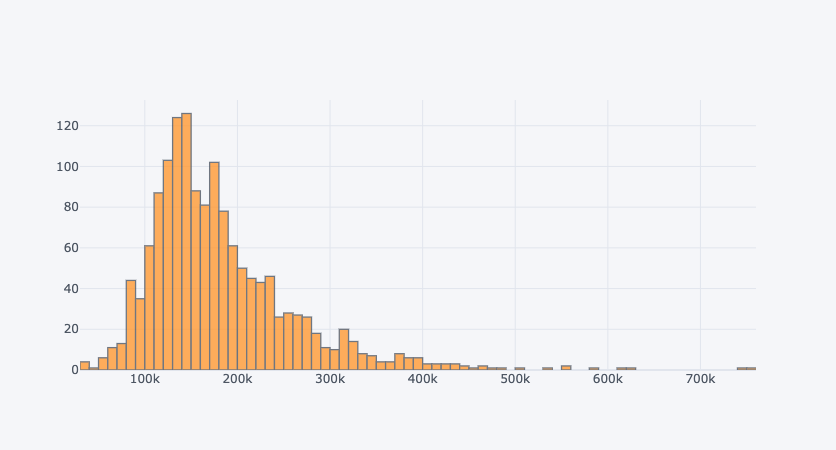

In [73]:
# Above grade (ground) living area square feet
# creating a histogram

df['SalePrice'].iplot(kind='hist')

In [88]:
# pivot table

ptable_grlivarea = df.pivot_table(values='SalePrice',
                             columns='GrLivArea',
                             aggfunc='mean',
                            index=False).T

ptable_grlivarea

KeyError: False

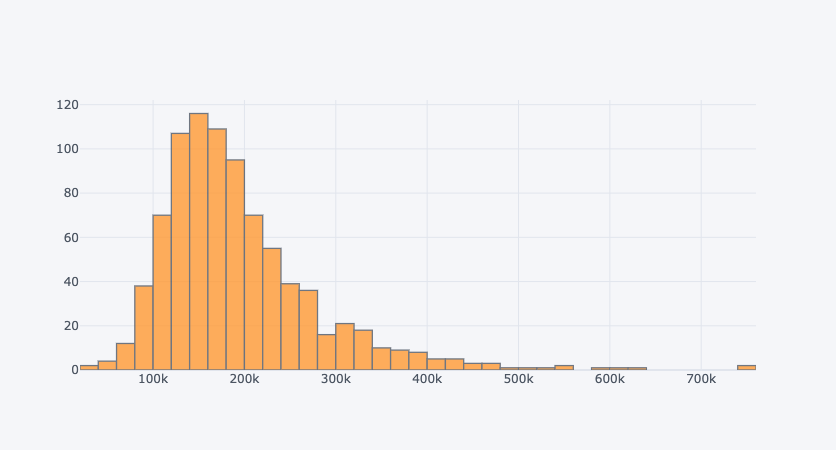

In [85]:
ptable_grlivarea.iplot(kind='hist')

### Factor 5: Sale price by Full Bath

In [79]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,TotalBaths,AgesBuilt,AgesRemodAdd
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,12.247694,4,18,18
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,12.109011,3,45,45
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,12.317167,4,20,19
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,11.849398,2,106,51
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,12.429216,4,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,8,2007,WD,Normal,175000,12.072541,3,22,21
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2010,WD,Normal,210000,12.254863,3,43,33
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2500,5,2010,WD,Normal,266500,12.493130,2,80,15
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,4,2010,WD,Normal,142125,11.864462,2,71,25
